In [1]:
import numpy as np
import pandas as pd


In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
import seaborn as sns

In [4]:
data = pd.read_csv("C:\\Users\\Admin\\Desktop\\ASSIGNMENT\\delivery_time.csv")

In [5]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
data = data.rename({'Delivery Time':'Delivery_Time','Sorting Time' : 'Sorting_Time'},axis=1)

In [7]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


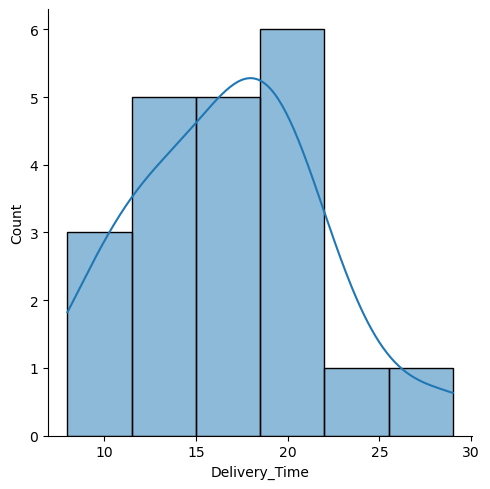

In [8]:
sns.displot(data['Delivery_Time'],kde=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


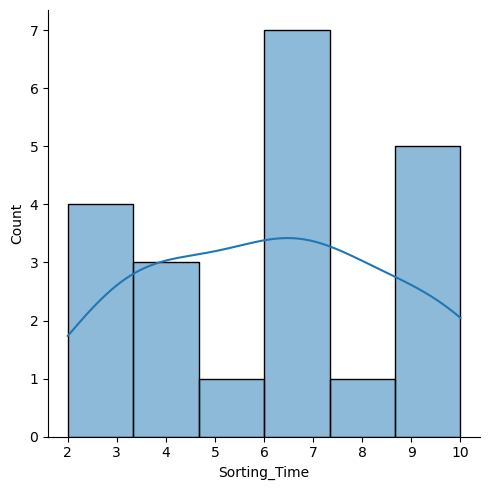

In [10]:
sns.displot(data['Sorting_Time'],kde=True)

In [11]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time ~ Sorting_Time",data = data).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           3.98e-06
Time:                        07:32:01   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

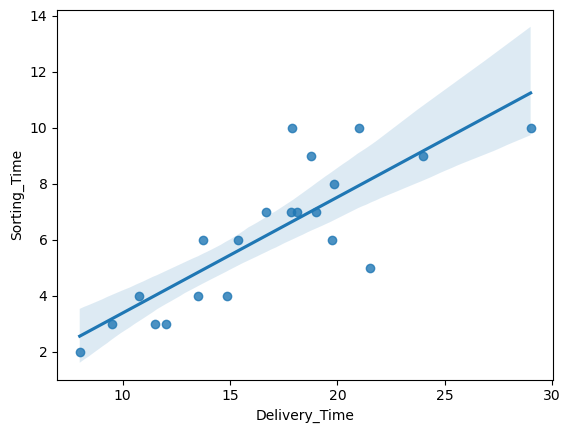

In [13]:
import matplotlib.pyplot as plt
sns.regplot(x="Delivery_Time", y="Sorting_Time", data=data)
plt.show()

In [14]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [15]:
print(model.tvalues, '\n', model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [16]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [17]:
newdata = pd.Series([10,4,6,9,10,6,7,3,10,9,8,4,7,3,3,4,6,7,2,7,5])

In [18]:
data_pred = pd.DataFrame(newdata,columns=['Sorting_Time'])

In [19]:
data_pred

,Sorting_Time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [20]:
model.predict(data_pred)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

2Q) Salary data

In [21]:
data1 = pd.read_csv("C:\\Users\\Admin\\Desktop\\ASSIGNMENT\\Salary_Data.csv")

In [22]:
data1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [23]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


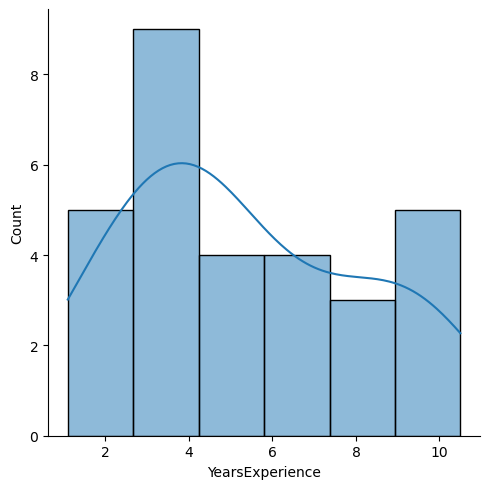

In [24]:
import seaborn as sns
sns.displot(data1['YearsExperience'], kde=True)

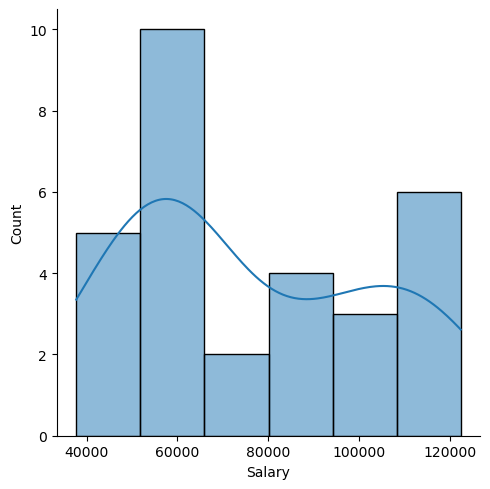

In [25]:
sns.displot(data1['Salary'],kde=True)

In [26]:
import statsmodels.formula.api as smf

In [27]:
model = smf.ols("YearsExperience~Salary", data=data1).fit()

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           1.14e-20
Time:                        07:32:03   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
import matplotlib.pyplot as plt

<Axes: xlabel='YearsExperience', ylabel='Salary'>

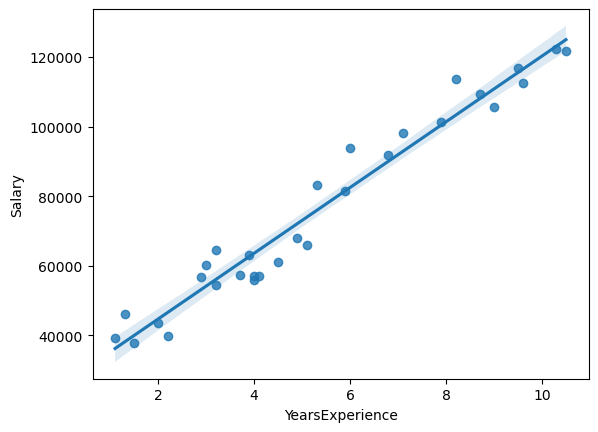

In [30]:
sns.regplot(x="YearsExperience",y="Salary", data=data1)

In [31]:
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [32]:
print(model.tvalues, "\n", model.pvalues)

Intercept    -7.281283
Salary       24.950094
dtype: float64 
 Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64


In [36]:
model.predict(data1)

0      1.600934
1      2.295819
2      1.437694
3      2.024427
4      1.656428
5      3.352729
6      3.707969
7      3.130248
8      4.142905
9      3.408121
10     4.018652
11     3.266856
12     3.384628
13     3.397185
14     3.805285
15     4.496626
16     4.303310
17     6.030801
18     5.856117
19     7.129735
20     6.906748
21     7.568520
22     7.875253
23     9.142087
24     8.698442
25     8.308670
26     9.461782
27     9.022897
28    10.010845
29     9.958288
dtype: float64

In [44]:
data1_pred = pd.DataFrame(newdata,columns=['YearsExperience'])

In [45]:
data1_pred

,YearsExperience
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9
